In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.optimizers import RMSprop,Adam

In [2]:
img = image.load_img("train/Dark/dark (1).png")

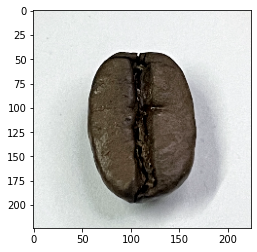

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("train/Dark/dark (1).png")

array([[[227, 230, 228],
        [233, 236, 234],
        [226, 229, 227],
        ...,
        [239, 241, 241],
        [235, 235, 235],
        [233, 236, 235]],

       [[225, 228, 225],
        [234, 237, 235],
        [227, 231, 228],
        ...,
        [237, 239, 239],
        [240, 240, 240],
        [238, 240, 240]],

       [[228, 232, 229],
        [230, 233, 230],
        [227, 231, 228],
        ...,
        [237, 239, 239],
        [235, 238, 237],
        [239, 242, 241]],

       ...,

       [[239, 240, 237],
        [235, 236, 234],
        [240, 241, 238],
        ...,
        [239, 238, 236],
        [236, 234, 232],
        [237, 235, 233]],

       [[228, 230, 225],
        [236, 238, 233],
        [232, 233, 228],
        ...,
        [239, 238, 236],
        [239, 238, 236],
        [237, 236, 234]],

       [[230, 232, 227],
        [227, 228, 224],
        [235, 237, 232],
        ...,
        [237, 236, 234],
        [238, 237, 235],
        [236, 235, 233]]

In [5]:
cv2.imread("train/Dark/dark (1).png").shape

(224, 224, 3)

# height,width,colors

In [6]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [7]:
train_dataset = train.flow_from_directory("train/",
                                         target_size =(128,128),
                                         batch_size = 1,
                                         class_mode = 'categorical',
                                         color_mode='rgb',
                                         )

# alt test_dataset I'should make an alias
validation_dataset = train.flow_from_directory("test/",
                                         target_size =(128,128),
                                         batch_size = 1,
                                         class_mode = 'categorical',
                                         color_mode='rgb')

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [8]:
train_dataset.class_indices

{'Dark': 0, 'Green': 1, 'Light': 2, 'Medium': 3}

In [9]:
class_indices = train_dataset.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

In [10]:
print(class_indices)

{0: 'Dark', 1: 'Green', 2: 'Light', 3: 'Medium'}


In [11]:
# 9:30 y_test = true_classes, x_train = train_dataset, X_test = validation_dataset

In [12]:
test_data_gen = ImageDataGenerator(rescale = 1/255.)

testgen = test_data_gen.flow_from_directory("test/",
                                         target_size =(128,128),
                                         batch_size = 1,
                                         class_mode = None,
                                         shuffle=False,
                                         seed=42)

Found 400 images belonging to 4 classes.


In [13]:
type(train_dataset)

keras.preprocessing.image.DirectoryIterator

In [14]:
train_dataset[0]

(array([[[[0.96470594, 0.9803922 , 0.9843138 ],
          [0.96470594, 0.9803922 , 0.9843138 ],
          [0.96470594, 0.9803922 , 0.9843138 ],
          ...,
          [0.93725497, 0.9490197 , 0.9450981 ],
          [0.95294124, 0.96470594, 0.9607844 ],
          [0.94117653, 0.95294124, 0.9490197 ]],
 
         [[0.9568628 , 0.9725491 , 0.97647065],
          [0.9607844 , 0.97647065, 0.9803922 ],
          [0.98823535, 1.        , 1.        ],
          ...,
          [0.94117653, 0.9490197 , 0.95294124],
          [0.9333334 , 0.93725497, 0.9490197 ],
          [0.9450981 , 0.95294124, 0.9490197 ]],
 
         [[0.97647065, 0.9960785 , 1.        ],
          [0.9568628 , 0.9725491 , 0.97647065],
          [0.9725491 , 0.98823535, 0.9921569 ],
          ...,
          [0.93725497, 0.9450981 , 0.95294124],
          [0.9450981 , 0.9568628 , 0.9607844 ],
          [0.9450981 , 0.95294124, 0.9490197 ]],
 
         ...,
 
         [[0.90196085, 0.9176471 , 0.9215687 ],
          [0.98039

In [15]:
encoder_input = keras.Input(shape=(128,128,3), name="img")
x = keras.layers.Flatten()(encoder_input)

encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input,encoder_output, name="encoder")

# test
# decoder_input = Input(shape=(128,128,3))
# decoder_input = Input(encoder_output.shape)

# decoder = keras.layers.Dense(64, activation = "relu")(decoder_input)
# x = keras.layers.Dense(49152, activation="relu")(decoder)
# decoder_output = keras.layers.Reshape((128,128,3))(x)

# decoder = keras.Model(decoder_input,decoder_output,name="decoder")
#

#working na dole

decoder_input = keras.layers.Dense(64, activation = "relu")(encoder_output)
x = keras.layers.Dense(49152, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((128,128,3))(x)

#qniec working

# decoder = keras.Model(decoder_input,decoder_output,name="decoder")


opt = keras.optimizers.Adam(lr=0.001,decay =1e-6)

autoencoder = keras.Model(encoder_input, decoder_output,name="autoencoder")
autoencoder.summary()

#new

encoding_dim = 49152 #2006
encoded_input=  keras.Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input,decoder_layer(encoded_input))

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 128, 128, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3145792   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 49152)             3194880   
_________________________________________________________________
reshape (Reshape)            (None, 128, 128, 3)       0         
Total params: 6,344,832
Trainable params: 6,344,832
Non-trainable params: 0
_____________________________________________

/home/kotmin/Semestr_5/venv/lib64/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
# Dostaliśmy wektor z 49152. wartościami, z sarmacką fantazją przekształcimy
#to w kolorowy obrazek 128x128. Co może pójść nie tak?

In [17]:
# Znalazłem już odpowiedź na to pytanie stąd zmiany w kodzie.

In [18]:
# W train dataset tak na prawde mamy iterator, a pod nim touple w ktorym: 
# train_dataset[_][0] - x
#train_dataset[_][1] - y

In [19]:
np.squeeze(train_dataset[0][0]).shape

(128, 128, 3)

In [20]:
a = np.empty(shape=(1200,128,128,3),dtype=float)
for i in range(0,1200):
    a[i] = np.squeeze(train_dataset[i][0])

In [21]:
a.shape

x_train = a

In [22]:
# Teraz nalezałoby się zająć x_test

In [23]:
x_test = np.empty(shape=(400,128,128,3),dtype=float)
for i in range(0,400):
    x_test[i] = np.squeeze(validation_dataset[i][0])

In [24]:
x_test.shape

(400, 128, 128, 3)

In [25]:
autoencoder.compile(opt,loss="mse", metrics = ['accuracy'])
history = autoencoder.fit(x_train,x_train,epochs=2000,batch_size=32,validation_split=0.1)

Epoch 1/2000
34/34 [==============================] - 5s 120ms/step - loss: 0.2320 - accuracy: 0.3876 - val_loss: 0.1729 - val_accuracy: 0.4075
Epoch 2/2000
34/34 [==============================] - 4s 107ms/step - loss: 0.1698 - accuracy: 0.4406 - val_loss: 0.1646 - val_accuracy: 0.4461
Epoch 3/2000
34/34 [==============================] - 4s 125ms/step - loss: 0.1638 - accuracy: 0.4629 - val_loss: 0.1617 - val_accuracy: 0.4582
Epoch 4/2000
34/34 [==============================] - 4s 122ms/step - loss: 0.1583 - accuracy: 0.4590 - val_loss: 0.1536 - val_accuracy: 0.4491
Epoch 5/2000
34/34 [==============================] - 4s 110ms/step - loss: 0.1525 - accuracy: 0.4488 - val_loss: 0.1464 - val_accuracy: 0.4390
Epoch 6/2000
34/34 [==============================] - 4s 111ms/step - loss: 0.1427 - accuracy: 0.4527 - val_loss: 0.1353 - val_accuracy: 0.4612
Epoch 7/2000
34/34 [==============================] - 3s 103ms/step - loss: 0.1340 - accuracy: 0.4624 - val_loss: 0.1278 - val_accuracy:

34/34 [==============================] - 3s 100ms/step - loss: 0.0574 - accuracy: 0.5562 - val_loss: 0.0573 - val_accuracy: 0.5517
Epoch 58/2000
34/34 [==============================] - 4s 105ms/step - loss: 0.0568 - accuracy: 0.5601 - val_loss: 0.0566 - val_accuracy: 0.5480
Epoch 59/2000
34/34 [==============================] - 3s 98ms/step - loss: 0.0564 - accuracy: 0.5596 - val_loss: 0.0562 - val_accuracy: 0.5575
Epoch 60/2000
34/34 [==============================] - 3s 102ms/step - loss: 0.0563 - accuracy: 0.5622 - val_loss: 0.0557 - val_accuracy: 0.5645
Epoch 61/2000
34/34 [==============================] - 3s 98ms/step - loss: 0.0553 - accuracy: 0.5600 - val_loss: 0.0549 - val_accuracy: 0.5572
Epoch 62/2000
34/34 [==============================] - 4s 103ms/step - loss: 0.0548 - accuracy: 0.5656 - val_loss: 0.0548 - val_accuracy: 0.5673
Epoch 63/2000
34/34 [==============================] - 3s 100ms/step - loss: 0.0543 - accuracy: 0.5675 - val_loss: 0.0538 - val_accuracy: 0.5611
E

34/34 [==============================] - 4s 105ms/step - loss: 0.0324 - accuracy: 0.6033 - val_loss: 0.0326 - val_accuracy: 0.5930
Epoch 114/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0323 - accuracy: 0.6008 - val_loss: 0.0327 - val_accuracy: 0.5961
Epoch 115/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0322 - accuracy: 0.6037 - val_loss: 0.0325 - val_accuracy: 0.5936
Epoch 116/2000
34/34 [==============================] - 3s 96ms/step - loss: 0.0319 - accuracy: 0.5975 - val_loss: 0.0323 - val_accuracy: 0.5906
Epoch 117/2000
34/34 [==============================] - 3s 103ms/step - loss: 0.0316 - accuracy: 0.6124 - val_loss: 0.0323 - val_accuracy: 0.6009
Epoch 118/2000
34/34 [==============================] - 3s 96ms/step - loss: 0.0316 - accuracy: 0.6043 - val_loss: 0.0322 - val_accuracy: 0.5935
Epoch 119/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0317 - accuracy: 0.6056 - val_loss: 0.0322 - val_accuracy: 0.594

34/34 [==============================] - 3s 81ms/step - loss: 0.0244 - accuracy: 0.6277 - val_loss: 0.0245 - val_accuracy: 0.6207
Epoch 170/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0235 - accuracy: 0.6343 - val_loss: 0.0242 - val_accuracy: 0.6222
Epoch 171/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0235 - accuracy: 0.6306 - val_loss: 0.0242 - val_accuracy: 0.6252
Epoch 172/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0234 - accuracy: 0.6342 - val_loss: 0.0239 - val_accuracy: 0.6282
Epoch 173/2000
34/34 [==============================] - 4s 108ms/step - loss: 0.0233 - accuracy: 0.6380 - val_loss: 0.0240 - val_accuracy: 0.6212
Epoch 174/2000
34/34 [==============================] - 3s 98ms/step - loss: 0.0235 - accuracy: 0.6309 - val_loss: 0.0242 - val_accuracy: 0.6213
Epoch 175/2000
34/34 [==============================] - 3s 96ms/step - loss: 0.0238 - accuracy: 0.6282 - val_loss: 0.0241 - val_accuracy: 0.6176

34/34 [==============================] - 3s 81ms/step - loss: 0.0210 - accuracy: 0.6472 - val_loss: 0.0219 - val_accuracy: 0.6470
Epoch 226/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0213 - accuracy: 0.6460 - val_loss: 0.0219 - val_accuracy: 0.6514
Epoch 227/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0211 - accuracy: 0.6549 - val_loss: 0.0218 - val_accuracy: 0.6392
Epoch 228/2000
34/34 [==============================] - 3s 82ms/step - loss: 0.0210 - accuracy: 0.6536 - val_loss: 0.0221 - val_accuracy: 0.6237
Epoch 229/2000
34/34 [==============================] - 3s 82ms/step - loss: 0.0210 - accuracy: 0.6479 - val_loss: 0.0219 - val_accuracy: 0.6167
Epoch 230/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0209 - accuracy: 0.6366 - val_loss: 0.0216 - val_accuracy: 0.6256
Epoch 231/2000
34/34 [==============================] - 3s 82ms/step - loss: 0.0208 - accuracy: 0.6487 - val_loss: 0.0216 - val_accuracy: 0.6281


34/34 [==============================] - 3s 82ms/step - loss: 0.0194 - accuracy: 0.6608 - val_loss: 0.0200 - val_accuracy: 0.6488
Epoch 282/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0192 - accuracy: 0.6636 - val_loss: 0.0202 - val_accuracy: 0.6436
Epoch 283/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0192 - accuracy: 0.6568 - val_loss: 0.0202 - val_accuracy: 0.6680
Epoch 284/2000
34/34 [==============================] - 3s 82ms/step - loss: 0.0193 - accuracy: 0.6633 - val_loss: 0.0206 - val_accuracy: 0.6560
Epoch 285/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0194 - accuracy: 0.6607 - val_loss: 0.0207 - val_accuracy: 0.6577
Epoch 286/2000
34/34 [==============================] - 3s 77ms/step - loss: 0.0195 - accuracy: 0.6579 - val_loss: 0.0200 - val_accuracy: 0.6543
Epoch 287/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0190 - accuracy: 0.6600 - val_loss: 0.0198 - val_accuracy: 0.6597


34/34 [==============================] - 3s 78ms/step - loss: 0.0179 - accuracy: 0.6626 - val_loss: 0.0189 - val_accuracy: 0.6689
Epoch 338/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0179 - accuracy: 0.6664 - val_loss: 0.0188 - val_accuracy: 0.6747
Epoch 339/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0181 - accuracy: 0.6698 - val_loss: 0.0193 - val_accuracy: 0.6716
Epoch 340/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0181 - accuracy: 0.6639 - val_loss: 0.0191 - val_accuracy: 0.6695
Epoch 341/2000
34/34 [==============================] - 3s 76ms/step - loss: 0.0181 - accuracy: 0.6642 - val_loss: 0.0193 - val_accuracy: 0.6648
Epoch 342/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0180 - accuracy: 0.6688 - val_loss: 0.0188 - val_accuracy: 0.6566
Epoch 343/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0178 - accuracy: 0.6665 - val_loss: 0.0187 - val_accuracy: 0.6570


34/34 [==============================] - 3s 84ms/step - loss: 0.0172 - accuracy: 0.6683 - val_loss: 0.0182 - val_accuracy: 0.6689
Epoch 394/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0172 - accuracy: 0.6617 - val_loss: 0.0182 - val_accuracy: 0.6736
Epoch 395/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0171 - accuracy: 0.6714 - val_loss: 0.0182 - val_accuracy: 0.6604
Epoch 396/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0170 - accuracy: 0.6724 - val_loss: 0.0182 - val_accuracy: 0.6323
Epoch 397/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0171 - accuracy: 0.6732 - val_loss: 0.0185 - val_accuracy: 0.6746
Epoch 398/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0170 - accuracy: 0.6707 - val_loss: 0.0181 - val_accuracy: 0.6751
Epoch 399/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0170 - accuracy: 0.6752 - val_loss: 0.0181 - val_accuracy: 0.6626


34/34 [==============================] - 4s 104ms/step - loss: 0.0164 - accuracy: 0.6698 - val_loss: 0.0173 - val_accuracy: 0.6743
Epoch 450/2000
34/34 [==============================] - 4s 115ms/step - loss: 0.0164 - accuracy: 0.6710 - val_loss: 0.0176 - val_accuracy: 0.6783
Epoch 451/2000
34/34 [==============================] - 4s 104ms/step - loss: 0.0168 - accuracy: 0.6709 - val_loss: 0.0177 - val_accuracy: 0.6714
Epoch 452/2000
34/34 [==============================] - 4s 129ms/step - loss: 0.0166 - accuracy: 0.6722 - val_loss: 0.0176 - val_accuracy: 0.6708
Epoch 453/2000
34/34 [==============================] - 3s 99ms/step - loss: 0.0163 - accuracy: 0.6728 - val_loss: 0.0173 - val_accuracy: 0.6714
Epoch 454/2000
34/34 [==============================] - 3s 99ms/step - loss: 0.0163 - accuracy: 0.6705 - val_loss: 0.0173 - val_accuracy: 0.6649
Epoch 455/2000
34/34 [==============================] - 3s 96ms/step - loss: 0.0162 - accuracy: 0.6709 - val_loss: 0.0174 - val_accuracy: 0.6

34/34 [==============================] - 3s 79ms/step - loss: 0.0154 - accuracy: 0.6749 - val_loss: 0.0165 - val_accuracy: 0.6722
Epoch 506/2000
34/34 [==============================] - 3s 77ms/step - loss: 0.0153 - accuracy: 0.6762 - val_loss: 0.0165 - val_accuracy: 0.6724
Epoch 507/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0153 - accuracy: 0.6768 - val_loss: 0.0166 - val_accuracy: 0.6725
Epoch 508/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0153 - accuracy: 0.6783 - val_loss: 0.0164 - val_accuracy: 0.6647
Epoch 509/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0153 - accuracy: 0.6720 - val_loss: 0.0166 - val_accuracy: 0.6749
Epoch 510/2000
34/34 [==============================] - 3s 82ms/step - loss: 0.0156 - accuracy: 0.6715 - val_loss: 0.0173 - val_accuracy: 0.6551
Epoch 511/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0158 - accuracy: 0.6687 - val_loss: 0.0167 - val_accuracy: 0.6664


34/34 [==============================] - 3s 80ms/step - loss: 0.0159 - accuracy: 0.6675 - val_loss: 0.0164 - val_accuracy: 0.6622
Epoch 562/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0152 - accuracy: 0.6732 - val_loss: 0.0163 - val_accuracy: 0.6761
Epoch 563/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0150 - accuracy: 0.6772 - val_loss: 0.0162 - val_accuracy: 0.6647
Epoch 564/2000
34/34 [==============================] - 3s 76ms/step - loss: 0.0149 - accuracy: 0.6804 - val_loss: 0.0162 - val_accuracy: 0.6705
Epoch 565/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0148 - accuracy: 0.6806 - val_loss: 0.0161 - val_accuracy: 0.6715
Epoch 566/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0149 - accuracy: 0.6799 - val_loss: 0.0163 - val_accuracy: 0.6637
Epoch 567/2000
34/34 [==============================] - 3s 75ms/step - loss: 0.0149 - accuracy: 0.6783 - val_loss: 0.0164 - val_accuracy: 0.6616


34/34 [==============================] - 3s 80ms/step - loss: 0.0147 - accuracy: 0.6737 - val_loss: 0.0160 - val_accuracy: 0.6788
Epoch 618/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0148 - accuracy: 0.6748 - val_loss: 0.0159 - val_accuracy: 0.6684
Epoch 619/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0146 - accuracy: 0.6767 - val_loss: 0.0158 - val_accuracy: 0.6733
Epoch 620/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0146 - accuracy: 0.6731 - val_loss: 0.0159 - val_accuracy: 0.6748
Epoch 621/2000
34/34 [==============================] - 3s 76ms/step - loss: 0.0147 - accuracy: 0.6766 - val_loss: 0.0159 - val_accuracy: 0.6756
Epoch 622/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0147 - accuracy: 0.6728 - val_loss: 0.0160 - val_accuracy: 0.6737
Epoch 623/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0146 - accuracy: 0.6780 - val_loss: 0.0160 - val_accuracy: 0.6654


34/34 [==============================] - 3s 76ms/step - loss: 0.0142 - accuracy: 0.6761 - val_loss: 0.0158 - val_accuracy: 0.6699
Epoch 674/2000
34/34 [==============================] - 2s 72ms/step - loss: 0.0143 - accuracy: 0.6798 - val_loss: 0.0155 - val_accuracy: 0.6763
Epoch 675/2000
34/34 [==============================] - 3s 76ms/step - loss: 0.0141 - accuracy: 0.6753 - val_loss: 0.0157 - val_accuracy: 0.6755
Epoch 676/2000
34/34 [==============================] - 3s 74ms/step - loss: 0.0141 - accuracy: 0.6732 - val_loss: 0.0154 - val_accuracy: 0.6762
Epoch 677/2000
34/34 [==============================] - 3s 76ms/step - loss: 0.0141 - accuracy: 0.6787 - val_loss: 0.0155 - val_accuracy: 0.6766
Epoch 678/2000
34/34 [==============================] - 3s 77ms/step - loss: 0.0143 - accuracy: 0.6778 - val_loss: 0.0155 - val_accuracy: 0.6813
Epoch 679/2000
34/34 [==============================] - 2s 73ms/step - loss: 0.0144 - accuracy: 0.6789 - val_loss: 0.0154 - val_accuracy: 0.6747


34/34 [==============================] - 3s 75ms/step - loss: 0.0139 - accuracy: 0.6807 - val_loss: 0.0158 - val_accuracy: 0.6646
Epoch 730/2000
34/34 [==============================] - 2s 71ms/step - loss: 0.0141 - accuracy: 0.6805 - val_loss: 0.0154 - val_accuracy: 0.6721
Epoch 731/2000
34/34 [==============================] - 2s 73ms/step - loss: 0.0140 - accuracy: 0.6758 - val_loss: 0.0153 - val_accuracy: 0.6760
Epoch 732/2000
34/34 [==============================] - 3s 76ms/step - loss: 0.0139 - accuracy: 0.6801 - val_loss: 0.0154 - val_accuracy: 0.6698
Epoch 733/2000
34/34 [==============================] - 3s 77ms/step - loss: 0.0141 - accuracy: 0.6778 - val_loss: 0.0158 - val_accuracy: 0.6657
Epoch 734/2000
34/34 [==============================] - 3s 78ms/step - loss: 0.0142 - accuracy: 0.6732 - val_loss: 0.0154 - val_accuracy: 0.6756
Epoch 735/2000
34/34 [==============================] - 3s 73ms/step - loss: 0.0139 - accuracy: 0.6791 - val_loss: 0.0151 - val_accuracy: 0.6792


34/34 [==============================] - 3s 75ms/step - loss: 0.0138 - accuracy: 0.6799 - val_loss: 0.0158 - val_accuracy: 0.6795
Epoch 786/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0140 - accuracy: 0.6790 - val_loss: 0.0151 - val_accuracy: 0.6716
Epoch 787/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0137 - accuracy: 0.6795 - val_loss: 0.0150 - val_accuracy: 0.6750
Epoch 788/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0137 - accuracy: 0.6777 - val_loss: 0.0150 - val_accuracy: 0.6682
Epoch 789/2000
34/34 [==============================] - 3s 78ms/step - loss: 0.0137 - accuracy: 0.6818 - val_loss: 0.0150 - val_accuracy: 0.6788
Epoch 790/2000
34/34 [==============================] - 3s 78ms/step - loss: 0.0135 - accuracy: 0.6816 - val_loss: 0.0149 - val_accuracy: 0.6742
Epoch 791/2000
34/34 [==============================] - 3s 77ms/step - loss: 0.0136 - accuracy: 0.6825 - val_loss: 0.0150 - val_accuracy: 0.6716


34/34 [==============================] - 3s 76ms/step - loss: 0.0135 - accuracy: 0.6806 - val_loss: 0.0152 - val_accuracy: 0.6720
Epoch 842/2000
34/34 [==============================] - 3s 76ms/step - loss: 0.0134 - accuracy: 0.6799 - val_loss: 0.0149 - val_accuracy: 0.6809
Epoch 843/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0135 - accuracy: 0.6799 - val_loss: 0.0149 - val_accuracy: 0.6792
Epoch 844/2000
34/34 [==============================] - 3s 76ms/step - loss: 0.0134 - accuracy: 0.6794 - val_loss: 0.0149 - val_accuracy: 0.6772
Epoch 845/2000
34/34 [==============================] - 2s 73ms/step - loss: 0.0134 - accuracy: 0.6798 - val_loss: 0.0148 - val_accuracy: 0.6732
Epoch 846/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0134 - accuracy: 0.6811 - val_loss: 0.0148 - val_accuracy: 0.6827
Epoch 847/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0135 - accuracy: 0.6813 - val_loss: 0.0148 - val_accuracy: 0.6761


34/34 [==============================] - 3s 89ms/step - loss: 0.0131 - accuracy: 0.6826 - val_loss: 0.0145 - val_accuracy: 0.6787
Epoch 898/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0130 - accuracy: 0.6809 - val_loss: 0.0145 - val_accuracy: 0.6783
Epoch 899/2000
34/34 [==============================] - 3s 99ms/step - loss: 0.0129 - accuracy: 0.6836 - val_loss: 0.0144 - val_accuracy: 0.6748
Epoch 900/2000
34/34 [==============================] - 3s 96ms/step - loss: 0.0130 - accuracy: 0.6832 - val_loss: 0.0148 - val_accuracy: 0.6732
Epoch 901/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0131 - accuracy: 0.6870 - val_loss: 0.0144 - val_accuracy: 0.6785
Epoch 902/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0130 - accuracy: 0.6844 - val_loss: 0.0147 - val_accuracy: 0.6733
Epoch 903/2000
34/34 [==============================] - 3s 97ms/step - loss: 0.0133 - accuracy: 0.6750 - val_loss: 0.0146 - val_accuracy: 0.6699


34/34 [==============================] - 4s 117ms/step - loss: 0.0131 - accuracy: 0.6759 - val_loss: 0.0143 - val_accuracy: 0.6783
Epoch 954/2000
34/34 [==============================] - 4s 121ms/step - loss: 0.0130 - accuracy: 0.6801 - val_loss: 0.0143 - val_accuracy: 0.6707
Epoch 955/2000
34/34 [==============================] - 4s 120ms/step - loss: 0.0128 - accuracy: 0.6797 - val_loss: 0.0142 - val_accuracy: 0.6780
Epoch 956/2000
34/34 [==============================] - 4s 130ms/step - loss: 0.0127 - accuracy: 0.6777 - val_loss: 0.0142 - val_accuracy: 0.6745
Epoch 957/2000
34/34 [==============================] - 4s 127ms/step - loss: 0.0127 - accuracy: 0.6827 - val_loss: 0.0142 - val_accuracy: 0.6811
Epoch 958/2000
34/34 [==============================] - 4s 123ms/step - loss: 0.0128 - accuracy: 0.6806 - val_loss: 0.0144 - val_accuracy: 0.6777
Epoch 959/2000
34/34 [==============================] - 4s 127ms/step - loss: 0.0130 - accuracy: 0.6775 - val_loss: 0.0142 - val_accuracy: 

34/34 [==============================] - 4s 131ms/step - loss: 0.0126 - accuracy: 0.6828 - val_loss: 0.0141 - val_accuracy: 0.6670
Epoch 1010/2000
34/34 [==============================] - 4s 126ms/step - loss: 0.0126 - accuracy: 0.6835 - val_loss: 0.0142 - val_accuracy: 0.6778
Epoch 1011/2000
34/34 [==============================] - 4s 125ms/step - loss: 0.0127 - accuracy: 0.6811 - val_loss: 0.0140 - val_accuracy: 0.6705
Epoch 1012/2000
34/34 [==============================] - 4s 125ms/step - loss: 0.0125 - accuracy: 0.6837 - val_loss: 0.0141 - val_accuracy: 0.6726
Epoch 1013/2000
34/34 [==============================] - 4s 124ms/step - loss: 0.0124 - accuracy: 0.6864 - val_loss: 0.0140 - val_accuracy: 0.6767
Epoch 1014/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0124 - accuracy: 0.6827 - val_loss: 0.0140 - val_accuracy: 0.6817
Epoch 1015/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0125 - accuracy: 0.6789 - val_loss: 0.0141 - val_accura

34/34 [==============================] - 3s 101ms/step - loss: 0.0123 - accuracy: 0.6854 - val_loss: 0.0139 - val_accuracy: 0.6696
Epoch 1066/2000
34/34 [==============================] - 3s 97ms/step - loss: 0.0123 - accuracy: 0.6843 - val_loss: 0.0138 - val_accuracy: 0.6806
Epoch 1067/2000
34/34 [==============================] - 3s 101ms/step - loss: 0.0123 - accuracy: 0.6836 - val_loss: 0.0139 - val_accuracy: 0.6781
Epoch 1068/2000
34/34 [==============================] - 3s 97ms/step - loss: 0.0123 - accuracy: 0.6825 - val_loss: 0.0139 - val_accuracy: 0.6705
Epoch 1069/2000
34/34 [==============================] - 3s 102ms/step - loss: 0.0123 - accuracy: 0.6783 - val_loss: 0.0139 - val_accuracy: 0.6767
Epoch 1070/2000
34/34 [==============================] - 3s 99ms/step - loss: 0.0123 - accuracy: 0.6818 - val_loss: 0.0143 - val_accuracy: 0.6697
Epoch 1071/2000
34/34 [==============================] - 3s 100ms/step - loss: 0.0124 - accuracy: 0.6844 - val_loss: 0.0140 - val_accurac

34/34 [==============================] - 3s 99ms/step - loss: 0.0122 - accuracy: 0.6814 - val_loss: 0.0137 - val_accuracy: 0.6754
Epoch 1122/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0121 - accuracy: 0.6865 - val_loss: 0.0139 - val_accuracy: 0.6602
Epoch 1123/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0121 - accuracy: 0.6838 - val_loss: 0.0137 - val_accuracy: 0.6806
Epoch 1124/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0121 - accuracy: 0.6801 - val_loss: 0.0139 - val_accuracy: 0.6770
Epoch 1125/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0121 - accuracy: 0.6871 - val_loss: 0.0138 - val_accuracy: 0.6713
Epoch 1126/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0121 - accuracy: 0.6845 - val_loss: 0.0138 - val_accuracy: 0.6741
Epoch 1127/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0121 - accuracy: 0.6842 - val_loss: 0.0138 - val_accuracy: 0

34/34 [==============================] - 3s 80ms/step - loss: 0.0122 - accuracy: 0.6851 - val_loss: 0.0138 - val_accuracy: 0.6745
Epoch 1178/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0120 - accuracy: 0.6843 - val_loss: 0.0137 - val_accuracy: 0.6765
Epoch 1179/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0120 - accuracy: 0.6862 - val_loss: 0.0138 - val_accuracy: 0.6616
Epoch 1180/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0121 - accuracy: 0.6839 - val_loss: 0.0140 - val_accuracy: 0.6783
Epoch 1181/2000
34/34 [==============================] - 3s 75ms/step - loss: 0.0123 - accuracy: 0.6766 - val_loss: 0.0139 - val_accuracy: 0.6676
Epoch 1182/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0121 - accuracy: 0.6861 - val_loss: 0.0137 - val_accuracy: 0.6714
Epoch 1183/2000
34/34 [==============================] - 3s 82ms/step - loss: 0.0121 - accuracy: 0.6829 - val_loss: 0.0136 - val_accuracy: 0

34/34 [==============================] - 3s 78ms/step - loss: 0.0122 - accuracy: 0.6857 - val_loss: 0.0137 - val_accuracy: 0.6511
Epoch 1234/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0120 - accuracy: 0.6849 - val_loss: 0.0135 - val_accuracy: 0.6744
Epoch 1235/2000
34/34 [==============================] - 3s 78ms/step - loss: 0.0119 - accuracy: 0.6878 - val_loss: 0.0136 - val_accuracy: 0.6685
Epoch 1236/2000
34/34 [==============================] - 3s 77ms/step - loss: 0.0119 - accuracy: 0.6867 - val_loss: 0.0136 - val_accuracy: 0.6722
Epoch 1237/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0120 - accuracy: 0.6862 - val_loss: 0.0136 - val_accuracy: 0.6721
Epoch 1238/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0119 - accuracy: 0.6832 - val_loss: 0.0135 - val_accuracy: 0.6743
Epoch 1239/2000
34/34 [==============================] - 3s 76ms/step - loss: 0.0119 - accuracy: 0.6859 - val_loss: 0.0136 - val_accuracy: 0

34/34 [==============================] - 3s 80ms/step - loss: 0.0115 - accuracy: 0.6863 - val_loss: 0.0132 - val_accuracy: 0.6673
Epoch 1290/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0115 - accuracy: 0.6842 - val_loss: 0.0132 - val_accuracy: 0.6757
Epoch 1291/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0115 - accuracy: 0.6842 - val_loss: 0.0131 - val_accuracy: 0.6763
Epoch 1292/2000
34/34 [==============================] - 3s 77ms/step - loss: 0.0114 - accuracy: 0.6877 - val_loss: 0.0131 - val_accuracy: 0.6751
Epoch 1293/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0115 - accuracy: 0.6801 - val_loss: 0.0133 - val_accuracy: 0.6810
Epoch 1294/2000
34/34 [==============================] - 3s 76ms/step - loss: 0.0114 - accuracy: 0.6877 - val_loss: 0.0133 - val_accuracy: 0.6693
Epoch 1295/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0115 - accuracy: 0.6827 - val_loss: 0.0131 - val_accuracy: 0

34/34 [==============================] - 3s 84ms/step - loss: 0.0110 - accuracy: 0.6843 - val_loss: 0.0126 - val_accuracy: 0.6738
Epoch 1346/2000
34/34 [==============================] - 3s 77ms/step - loss: 0.0108 - accuracy: 0.6887 - val_loss: 0.0124 - val_accuracy: 0.6736
Epoch 1347/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0107 - accuracy: 0.6878 - val_loss: 0.0125 - val_accuracy: 0.6690
Epoch 1348/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0108 - accuracy: 0.6843 - val_loss: 0.0124 - val_accuracy: 0.6691
Epoch 1349/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0107 - accuracy: 0.6854 - val_loss: 0.0124 - val_accuracy: 0.6792
Epoch 1350/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0107 - accuracy: 0.6804 - val_loss: 0.0126 - val_accuracy: 0.6779
Epoch 1351/2000
34/34 [==============================] - 3s 82ms/step - loss: 0.0110 - accuracy: 0.6831 - val_loss: 0.0127 - val_accuracy: 0

34/34 [==============================] - 3s 82ms/step - loss: 0.0106 - accuracy: 0.6840 - val_loss: 0.0125 - val_accuracy: 0.6685
Epoch 1402/2000
34/34 [==============================] - 4s 108ms/step - loss: 0.0105 - accuracy: 0.6902 - val_loss: 0.0123 - val_accuracy: 0.6704
Epoch 1403/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0104 - accuracy: 0.6895 - val_loss: 0.0122 - val_accuracy: 0.6678
Epoch 1404/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0104 - accuracy: 0.6832 - val_loss: 0.0121 - val_accuracy: 0.6682
Epoch 1405/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0105 - accuracy: 0.6888 - val_loss: 0.0121 - val_accuracy: 0.6697
Epoch 1406/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0105 - accuracy: 0.6824 - val_loss: 0.0122 - val_accuracy: 0.6731
Epoch 1407/2000
34/34 [==============================] - 4s 110ms/step - loss: 0.0103 - accuracy: 0.6875 - val_loss: 0.0121 - val_accuracy:

Epoch 1457/2000
34/34 [==============================] - 4s 129ms/step - loss: 0.0105 - accuracy: 0.6833 - val_loss: 0.0123 - val_accuracy: 0.6736
Epoch 1458/2000
34/34 [==============================] - 4s 121ms/step - loss: 0.0108 - accuracy: 0.6795 - val_loss: 0.0123 - val_accuracy: 0.6791
Epoch 1459/2000
34/34 [==============================] - 4s 123ms/step - loss: 0.0104 - accuracy: 0.6802 - val_loss: 0.0120 - val_accuracy: 0.6796
Epoch 1460/2000
34/34 [==============================] - 4s 110ms/step - loss: 0.0103 - accuracy: 0.6880 - val_loss: 0.0120 - val_accuracy: 0.6780
Epoch 1461/2000
34/34 [==============================] - 4s 113ms/step - loss: 0.0102 - accuracy: 0.6897 - val_loss: 0.0120 - val_accuracy: 0.6778
Epoch 1462/2000
34/34 [==============================] - 4s 122ms/step - loss: 0.0102 - accuracy: 0.6863 - val_loss: 0.0120 - val_accuracy: 0.6766
Epoch 1463/2000
34/34 [==============================] - 4s 123ms/step - loss: 0.0102 - accuracy: 0.6872 - val_loss: 0

Epoch 1513/2000
34/34 [==============================] - 4s 111ms/step - loss: 0.0100 - accuracy: 0.6887 - val_loss: 0.0118 - val_accuracy: 0.6753
Epoch 1514/2000
34/34 [==============================] - 4s 118ms/step - loss: 0.0100 - accuracy: 0.6861 - val_loss: 0.0119 - val_accuracy: 0.6787
Epoch 1515/2000
34/34 [==============================] - 4s 120ms/step - loss: 0.0100 - accuracy: 0.6886 - val_loss: 0.0119 - val_accuracy: 0.6734
Epoch 1516/2000
34/34 [==============================] - 4s 125ms/step - loss: 0.0101 - accuracy: 0.6909 - val_loss: 0.0120 - val_accuracy: 0.6764
Epoch 1517/2000
34/34 [==============================] - 4s 116ms/step - loss: 0.0101 - accuracy: 0.6893 - val_loss: 0.0119 - val_accuracy: 0.6770
Epoch 1518/2000
34/34 [==============================] - 4s 124ms/step - loss: 0.0101 - accuracy: 0.6873 - val_loss: 0.0120 - val_accuracy: 0.6780
Epoch 1519/2000
34/34 [==============================] - 4s 123ms/step - loss: 0.0102 - accuracy: 0.6915 - val_loss: 0

Epoch 1569/2000
34/34 [==============================] - 4s 111ms/step - loss: 0.0100 - accuracy: 0.6878 - val_loss: 0.0119 - val_accuracy: 0.6800
Epoch 1570/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0102 - accuracy: 0.6883 - val_loss: 0.0121 - val_accuracy: 0.6741
Epoch 1571/2000
34/34 [==============================] - 4s 105ms/step - loss: 0.0102 - accuracy: 0.6864 - val_loss: 0.0122 - val_accuracy: 0.6734
Epoch 1572/2000
34/34 [==============================] - 4s 110ms/step - loss: 0.0104 - accuracy: 0.6861 - val_loss: 0.0124 - val_accuracy: 0.6599
Epoch 1573/2000
34/34 [==============================] - 4s 111ms/step - loss: 0.0103 - accuracy: 0.6867 - val_loss: 0.0120 - val_accuracy: 0.6785
Epoch 1574/2000
34/34 [==============================] - 4s 104ms/step - loss: 0.0101 - accuracy: 0.6901 - val_loss: 0.0119 - val_accuracy: 0.6723
Epoch 1575/2000
34/34 [==============================] - 4s 106ms/step - loss: 0.0101 - accuracy: 0.6881 - val_loss: 0.

Epoch 1625/2000
34/34 [==============================] - 4s 107ms/step - loss: 0.0100 - accuracy: 0.6869 - val_loss: 0.0117 - val_accuracy: 0.6754
Epoch 1626/2000
34/34 [==============================] - 4s 111ms/step - loss: 0.0099 - accuracy: 0.6886 - val_loss: 0.0119 - val_accuracy: 0.6787
Epoch 1627/2000
34/34 [==============================] - 4s 107ms/step - loss: 0.0100 - accuracy: 0.6872 - val_loss: 0.0120 - val_accuracy: 0.6785
Epoch 1628/2000
34/34 [==============================] - 4s 104ms/step - loss: 0.0100 - accuracy: 0.6885 - val_loss: 0.0120 - val_accuracy: 0.6649
Epoch 1629/2000
34/34 [==============================] - 4s 110ms/step - loss: 0.0100 - accuracy: 0.6864 - val_loss: 0.0118 - val_accuracy: 0.6818
Epoch 1630/2000
34/34 [==============================] - 4s 120ms/step - loss: 0.0100 - accuracy: 0.6919 - val_loss: 0.0119 - val_accuracy: 0.6722
Epoch 1631/2000
34/34 [==============================] - 4s 121ms/step - loss: 0.0100 - accuracy: 0.6881 - val_loss: 0

Epoch 1681/2000
34/34 [==============================] - 4s 128ms/step - loss: 0.0100 - accuracy: 0.6824 - val_loss: 0.0117 - val_accuracy: 0.6791
Epoch 1682/2000
34/34 [==============================] - 4s 121ms/step - loss: 0.0099 - accuracy: 0.6907 - val_loss: 0.0118 - val_accuracy: 0.6661
Epoch 1683/2000
34/34 [==============================] - 4s 130ms/step - loss: 0.0100 - accuracy: 0.6835 - val_loss: 0.0117 - val_accuracy: 0.6709
Epoch 1684/2000
34/34 [==============================] - 4s 124ms/step - loss: 0.0100 - accuracy: 0.6858 - val_loss: 0.0120 - val_accuracy: 0.6778
Epoch 1685/2000
34/34 [==============================] - 4s 122ms/step - loss: 0.0098 - accuracy: 0.6912 - val_loss: 0.0117 - val_accuracy: 0.6702
Epoch 1686/2000
34/34 [==============================] - 4s 116ms/step - loss: 0.0098 - accuracy: 0.6879 - val_loss: 0.0117 - val_accuracy: 0.6712
Epoch 1687/2000
34/34 [==============================] - 4s 120ms/step - loss: 0.0099 - accuracy: 0.6902 - val_loss: 0

Epoch 1737/2000
34/34 [==============================] - 5s 159ms/step - loss: 0.0099 - accuracy: 0.6885 - val_loss: 0.0117 - val_accuracy: 0.6728
Epoch 1738/2000
34/34 [==============================] - 5s 148ms/step - loss: 0.0099 - accuracy: 0.6886 - val_loss: 0.0118 - val_accuracy: 0.6783
Epoch 1739/2000
34/34 [==============================] - 4s 122ms/step - loss: 0.0098 - accuracy: 0.6863 - val_loss: 0.0117 - val_accuracy: 0.6702
Epoch 1740/2000
34/34 [==============================] - 5s 136ms/step - loss: 0.0098 - accuracy: 0.6868 - val_loss: 0.0116 - val_accuracy: 0.6720
Epoch 1741/2000
34/34 [==============================] - 5s 138ms/step - loss: 0.0098 - accuracy: 0.6886 - val_loss: 0.0116 - val_accuracy: 0.6755
Epoch 1742/2000
34/34 [==============================] - 5s 134ms/step - loss: 0.0098 - accuracy: 0.6901 - val_loss: 0.0116 - val_accuracy: 0.6735
Epoch 1743/2000
34/34 [==============================] - 4s 132ms/step - loss: 0.0098 - accuracy: 0.6912 - val_loss: 0

Epoch 1793/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0098 - accuracy: 0.6873 - val_loss: 0.0116 - val_accuracy: 0.6777
Epoch 1794/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0099 - accuracy: 0.6889 - val_loss: 0.0117 - val_accuracy: 0.6817
Epoch 1795/2000
34/34 [==============================] - 3s 96ms/step - loss: 0.0098 - accuracy: 0.6917 - val_loss: 0.0116 - val_accuracy: 0.6691
Epoch 1796/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0097 - accuracy: 0.6884 - val_loss: 0.0116 - val_accuracy: 0.6735
Epoch 1797/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0099 - accuracy: 0.6838 - val_loss: 0.0115 - val_accuracy: 0.6737
Epoch 1798/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0097 - accuracy: 0.6878 - val_loss: 0.0114 - val_accuracy: 0.6762
Epoch 1799/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0096 - accuracy: 0.6874 - val_loss: 0.0115 -

34/34 [==============================] - 4s 104ms/step - loss: 0.0098 - accuracy: 0.6889 - val_loss: 0.0118 - val_accuracy: 0.6801
Epoch 1850/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0098 - accuracy: 0.6827 - val_loss: 0.0116 - val_accuracy: 0.6792
Epoch 1851/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0096 - accuracy: 0.6902 - val_loss: 0.0115 - val_accuracy: 0.6796
Epoch 1852/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0096 - accuracy: 0.6872 - val_loss: 0.0116 - val_accuracy: 0.6787
Epoch 1853/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0096 - accuracy: 0.6874 - val_loss: 0.0116 - val_accuracy: 0.6601
Epoch 1854/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0096 - accuracy: 0.6829 - val_loss: 0.0116 - val_accuracy: 0.6735
Epoch 1855/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0096 - accuracy: 0.6887 - val_loss: 0.0114 - val_accuracy: 

34/34 [==============================] - 3s 91ms/step - loss: 0.0094 - accuracy: 0.6950 - val_loss: 0.0116 - val_accuracy: 0.6728
Epoch 1906/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0095 - accuracy: 0.6898 - val_loss: 0.0116 - val_accuracy: 0.6728
Epoch 1907/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0096 - accuracy: 0.6914 - val_loss: 0.0118 - val_accuracy: 0.6659
Epoch 1908/2000
34/34 [==============================] - 3s 82ms/step - loss: 0.0097 - accuracy: 0.6883 - val_loss: 0.0114 - val_accuracy: 0.6721
Epoch 1909/2000
34/34 [==============================] - 3s 79ms/step - loss: 0.0095 - accuracy: 0.6877 - val_loss: 0.0115 - val_accuracy: 0.6804
Epoch 1910/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0096 - accuracy: 0.6844 - val_loss: 0.0116 - val_accuracy: 0.6682
Epoch 1911/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0095 - accuracy: 0.6864 - val_loss: 0.0115 - val_accuracy: 0

34/34 [==============================] - 3s 84ms/step - loss: 0.0096 - accuracy: 0.6854 - val_loss: 0.0114 - val_accuracy: 0.6798
Epoch 1962/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0095 - accuracy: 0.6907 - val_loss: 0.0114 - val_accuracy: 0.6807
Epoch 1963/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0095 - accuracy: 0.6910 - val_loss: 0.0116 - val_accuracy: 0.6721
Epoch 1964/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0096 - accuracy: 0.6867 - val_loss: 0.0114 - val_accuracy: 0.6677
Epoch 1965/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0096 - accuracy: 0.6879 - val_loss: 0.0116 - val_accuracy: 0.6779
Epoch 1966/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0096 - accuracy: 0.6862 - val_loss: 0.0114 - val_accuracy: 0.6764
Epoch 1967/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0095 - accuracy: 0.6917 - val_loss: 0.0113 - val_accuracy: 0

In [26]:
# Sprawdzmy czy to nam zadziala

In [27]:
example = encoder.predict([x_test[2].reshape(-1,128,128,3)])[0]

print(example)

[ 0.         0.         0.         0.        80.60547    0.
  0.         0.        19.707272   0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
 80.67202    0.         0.         0.         0.         0.
  0.         0.        56.950695   0.         0.         0.
 72.92759    0.         0.         0.         0.        34.512733
  0.         0.         0.         0.         5.6032157  0.
  0.         0.         0.         0.         0.        34.237263
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       ]


In [28]:
example.shape

(64,)

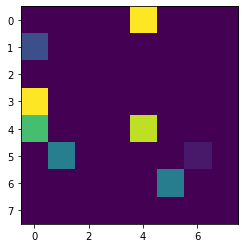

In [29]:
plt.imshow(example.reshape((8,8)))

In [30]:
# Oki tak wygląda wygenerowany przez nas chunk, troszkę mu jeszcze brakuje żeby nawet z daleka
# zaczął przypominać ziarno

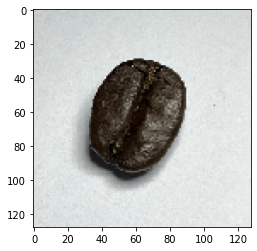

In [31]:
plt.imshow(x_test[2])

In [32]:
ae_out = autoencoder.predict([x_test[2].reshape(-1,128,128,3)])[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


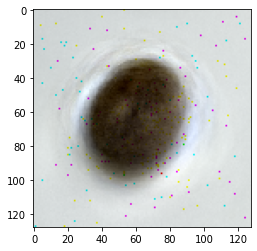

In [33]:
plt.imshow(ae_out)

In [34]:
ae_out.shape

(128, 128, 3)

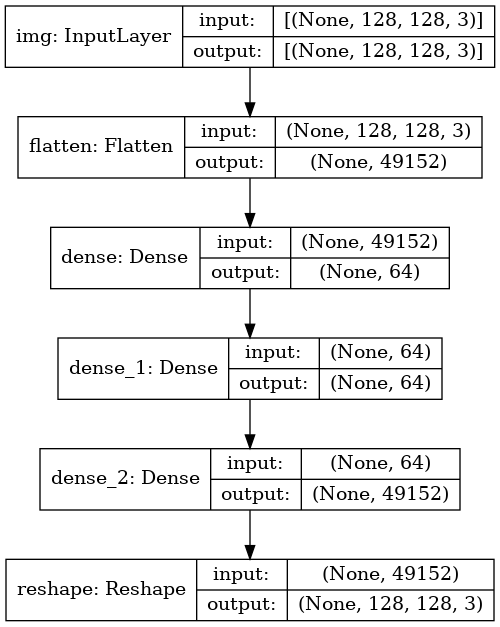

In [35]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['accuracy']
    val_accuracy = history.history['loss']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs,loss,label ='training_loss')
    plt.plot(epochs, val_loss,label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, acc,label = 'training_accuracy')
    plt.plot(epochs, val_loss,label = 'val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

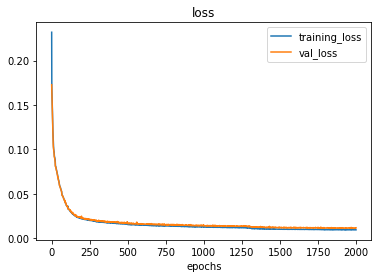

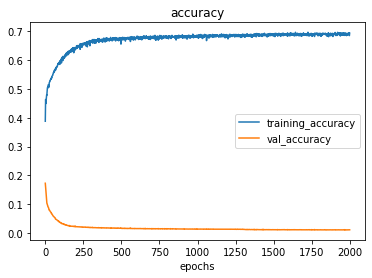

In [45]:
plot_loss_curves(history)

In [49]:
plt.plot(history.history['mean_squared_error'])

KeyError: 'mean_squared_error'

In [39]:
autoencoder.evaluate(x_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [40]:
# grid of rendered data
x_test_render = np.empty(shape=(400,128,128,3),dtype=float)
 
for i in range(0,400):
    x_test_render[i] = autoencoder.predict([x_test[i].reshape(-1,128,128,3)])[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

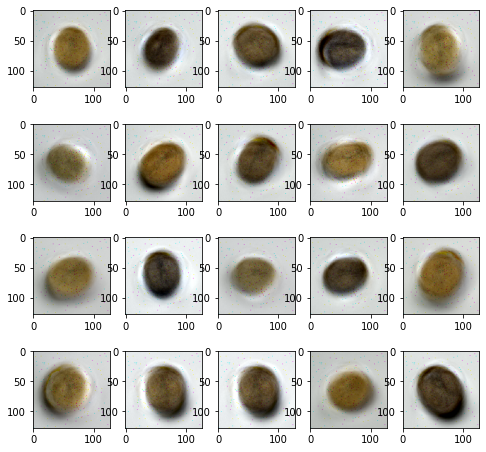

In [41]:
# show plot
fig = plt.figure(figsize=(8,8))
columns = 5
rows = 4

for i in range(1,columns*rows+1):
    img = x_test_render[i] # tutaj rownie dobrze mozna by rzucic random.choice()
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
    
plt.show()

In [42]:
pred_from_decoder = decoder.predict([x_test[4].reshape(-1,49152)])[0]

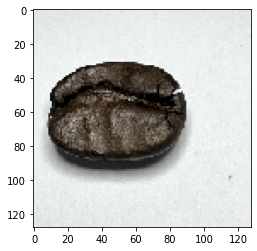

In [43]:
plt.imshow(pred_from_decoder)

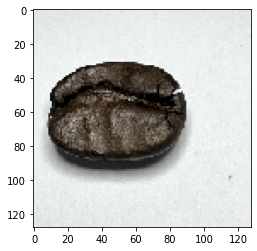

In [44]:
plt.imshow(x_test[4])

In [50]:
## Gan

In [51]:
# Zmieńmy delikatnie podejście w kwestii przetwarzania danych
tf.data.Dataset??

In [52]:
import numpy as np

In [197]:
data = tf.keras.utils.image_dataset_from_directory('train/', image_size = (128,128),batch_size=128)

Found 1200 files belonging to 4 classes.


In [196]:
tf.keras.utils.image_dataset_from_directory??

In [198]:
data_iterator = data.as_numpy_iterator()

In [199]:
batch = data_iterator.next()

In [200]:
batch[0].shape

(128, 128, 128, 3)

In [201]:
batch[1]

array([0, 3, 2, 3, 1, 2, 0, 3, 1, 3, 3, 1, 3, 2, 3, 2, 3, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 2, 1, 1, 0, 2, 0, 3, 3, 2, 1, 1, 3, 3, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 2, 2, 3, 2, 1, 0, 3, 2, 1, 2, 3, 2, 1, 2, 3,
       2, 3, 0, 1, 2, 2, 3, 0, 1, 1, 3, 0, 3, 0, 2, 1, 1, 3, 0, 2, 2, 1,
       3, 3, 2, 0, 1, 1, 0, 2, 0, 2, 1, 3, 3, 1, 1, 0, 1, 3, 2, 1, 1, 1,
       1, 0, 0, 1, 2, 2, 2, 1, 3, 3, 0, 2, 2, 0, 1, 1, 1, 2], dtype=int32)

In [202]:
batch[0].max()

255.0

In [62]:
## dobrze byłoby to przeskalowac

In [203]:
data = data.map(lambda x,y: (x/255,y))

In [204]:
scaled_iterator = data.as_numpy_iterator()

In [205]:
batch = scaled_iterator.next() #next iter

In [206]:
batch[0].max()

1.0

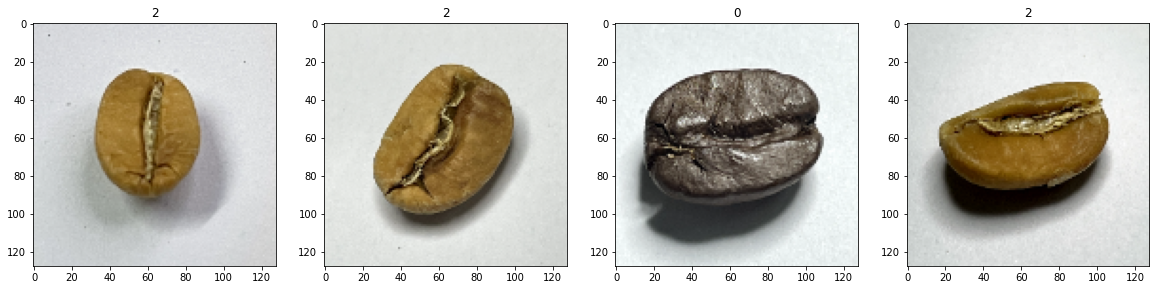

In [207]:
gig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [187]:
len(data)

38

In [69]:
# dla uproszczenia podzielimy zbior treningowy na kolejne mniejsze ( faworyzacja jednej metody? Alez skad)

In [208]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [189]:
train_size

26

In [190]:
val_size

8

In [191]:
test_size

4

In [80]:
# +1 aby wyrównac do 38 45:18,właściwie to nie potrzzebujemy tutaj przesadnie wiedzieć co jest czym

In [192]:
# Scale and return images only #  uzywac tego albo skalowanego iteratora
def scale_images(data):
    image = batch[0]
    return image/255

In [209]:
batch[0].shape

(128, 128, 128, 3)

In [210]:
data = data.cache()

In [211]:
data = data.prefetch(64)

In [88]:
# data.as_numpy_iterator().next().shape one batch[0] is in the format of ds
# dataiterator = batch.as_numpy_iterator

AttributeError: 'tuple' object has no attribute 'shape'

In [336]:
batch[0].max()

1.0

In [346]:
# Czas na generator
from tensorflow.keras.models import Sequential,load_model # alt go with Functional
from tensorflow.keras.layers import Conv2D, Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D
from tensorflow.keras.layers import BatchNormalization,Activation
from tensorflow.keras.layers import ZeroPadding2D

import time
import os

from tqdm import tqdm
from PIL import Image


In [382]:
SEED_SIZE = 100

IMAGE_CHANNELS = 3

GENERATE_RES = 3 # rest factir alt: 32^GENERATE_RES

GENERATE_SQUARE = 32 * GENERATE_RES

PREVIEW_ROWS =4
PREVIEW_COLS = 7
PREVIEW_MARGIN = 16

DATA_PATH= 'train2'
EPOCHS = 80
BATCH_SIZE = 32
BUFFER_SIZE =60000

In [367]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


In [375]:
training_binary_path = os.path.join(DATA_PATH,
        f'training_data_{GENERATE_SQUARE}_{GENERATE_SQUARE}.npy')

print(f"Looking for file: {training_binary_path}")

if not os.path.isfile(training_binary_path):
  start = time.time()
  print("Loading training images...")

  training_data = []
  d_path = os.path.join(DATA_PATH,'')
  for filename in tqdm(os.listdir(d_path)):
      path = os.path.join(d_path,filename)
      image = Image.open(path).resize((GENERATE_SQUARE,
            GENERATE_SQUARE),Image.ANTIALIAS)
      training_data.append(np.asarray(image))
  training_data = np.reshape(training_data,(-1,GENERATE_SQUARE,
            GENERATE_SQUARE,IMAGE_CHANNELS))
  training_data = training_data.astype(np.float32)
  training_data = training_data / 127.5 - 1.


  print("Saving training image binary...")
  np.save(training_binary_path,training_data)
  elapsed = time.time()-start
  print (f'Image preprocess time: {hms_string(elapsed)}')
else:
  print("Loading previous training pickle...")
  training_data = np.load(training_binary_path)


Looking for file: train2/training_data_96_96.npy
Loading previous training pickle...


In [369]:
d_train_dataset = tf.data.Dataset.from_tensor_slices(training_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [354]:
def build_generator(seed_size, channels):
    model = Sequential()

    model.add(Dense(4*4*256,activation="relu",input_dim=seed_size))
    model.add(Reshape((4,4,256)))

    model.add(UpSampling2D())
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    model.add(UpSampling2D())
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
   
    # Output resolution, additional upsampling
    model.add(UpSampling2D())
    model.add(Conv2D(128,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    if GENERATE_RES>1:
      model.add(UpSampling2D(size=(GENERATE_RES,GENERATE_RES)))
      model.add(Conv2D(128,kernel_size=3,padding="same"))
      model.add(BatchNormalization(momentum=0.8))
      model.add(Activation("relu"))

    # Final CNN layer
    model.add(Conv2D(channels,kernel_size=3,padding="same"))
    model.add(Activation("tanh"))

    return model


def build_discriminator(image_shape):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, 
                     padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

In [376]:
def save_images(cnt,noise):
  image_array = np.full(( 
      PREVIEW_MARGIN + (PREVIEW_ROWS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 
      PREVIEW_MARGIN + (PREVIEW_COLS * (GENERATE_SQUARE+PREVIEW_MARGIN)), IMAGE_CHANNELS), 
      255, dtype=np.uint8)
  
  generated_images = generator.predict(noise)

  generated_images = 0.5 * generated_images + 0.5

  image_count = 0
  for row in range(PREVIEW_ROWS):
      for col in range(PREVIEW_COLS):
        r = row * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        c = col * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        image_array[r:r+GENERATE_SQUARE,c:c+GENERATE_SQUARE] \
            = generated_images[image_count] * 255
        image_count += 1

          
  output_path = os.path.join(DATA_PATH,'output')
  if not os.path.exists(output_path):
    os.makedirs(output_path)
  
  filename = os.path.join(output_path,f"train-{cnt}.png")
#   filename = f'generated/train-{cnt}.png'
  im = Image.fromarray(image_array)
  im.save(filename)

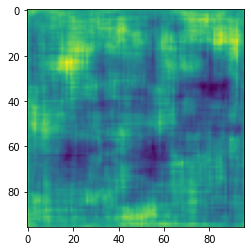

In [356]:
generator = build_generator(SEED_SIZE, IMAGE_CHANNELS)

noise = tf.random.normal([1, SEED_SIZE])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

In [357]:
image_shape = (GENERATE_SQUARE,GENERATE_SQUARE,IMAGE_CHANNELS)

discriminator = build_discriminator(image_shape)
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.49951953]], shape=(1, 1), dtype=float32)


In [358]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [359]:
generator_optimizer = tf.keras.optimizers.Adam(1.5e-4,0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1.5e-4,0.5)

In [371]:
# This annotation causes the function to be "compiled".
# @ tf . function that should be without that spacebars
def train_step(images):
  seed = tf.random.normal([BATCH_SIZE, SEED_SIZE])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(seed, training=True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)
    

    gradients_of_generator = gen_tape.gradient(
        gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(
        disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(
        gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(
        gradients_of_discriminator, 
        discriminator.trainable_variables))
  return gen_loss,disc_loss

In [372]:
def train(dataset, epochs):
  fixed_seed = np.random.normal(0, 1, (PREVIEW_ROWS * PREVIEW_COLS, 
                                       SEED_SIZE))
  start = time.time()

  for epoch in range(epochs):
    epoch_start = time.time()

    gen_loss_list = []
    disc_loss_list = []

    for image_batch in dataset:
      t = train_step(image_batch)
      gen_loss_list.append(t[0])
      disc_loss_list.append(t[1])

    g_loss = sum(gen_loss_list) / len(gen_loss_list)
    d_loss = sum(disc_loss_list) / len(disc_loss_list)

    epoch_elapsed = time.time()-epoch_start
    print (f'Epoch {epoch+1}, gen loss={g_loss},disc loss={d_loss},'
           f' {hms_string(epoch_elapsed)}')
    save_images(epoch,fixed_seed)

  elapsed = time.time()-start
  print (f'Training time: {hms_string(elapsed)}')

In [383]:
train(d_train_dataset, EPOCHS)

Epoch 1, gen loss=1.664015293121338,disc loss=1.3190598487854004, 0:06:11.78
Epoch 2, gen loss=1.7946879863739014,disc loss=1.4890775680541992, 0:05:39.32
Epoch 3, gen loss=1.993749737739563,disc loss=1.2315304279327393, 0:06:12.90
Epoch 4, gen loss=2.129293203353882,disc loss=1.1750869750976562, 0:06:51.31
Epoch 5, gen loss=2.401693105697632,disc loss=1.2468167543411255, 0:06:31.33
Epoch 6, gen loss=2.2501206398010254,disc loss=1.3163642883300781, 0:06:09.88
Epoch 7, gen loss=2.2801363468170166,disc loss=1.3668193817138672, 0:06:09.26
Epoch 8, gen loss=2.305337429046631,disc loss=1.2374697923660278, 0:06:08.52
Epoch 9, gen loss=2.403823137283325,disc loss=1.3483152389526367, 0:06:08.39
Epoch 10, gen loss=2.3995254039764404,disc loss=1.2284283638000488, 0:06:10.46
Epoch 11, gen loss=2.2928600311279297,disc loss=1.1789698600769043, 0:06:09.13
Epoch 12, gen loss=2.314950704574585,disc loss=1.20241379737854, 0:06:09.97
Epoch 13, gen loss=2.584207534790039,disc loss=1.2197002172470093, 0:0

In [386]:
generator.save(os.path.join(DATA_PATH,"bean_generator.h5"))

In [254]:
Dense??

In [385]:
generator.summary() #42.14 exp # 50:17 holystic

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 4096)              413696    
_________________________________________________________________
reshape_35 (Reshape)         (None, 4, 4, 256)         0         
_________________________________________________________________
up_sampling2d_82 (UpSampling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 8, 8, 256)         590080    
_________________________________________________________________
batch_normalization_11 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
activation_8 (Activation)    (None, 8, 8, 256)         0         
_________________________________________________________________
up_sampling2d_83 (UpSampling (None, 16, 16, 256)     